# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  DTW Discrete Wavelet Transform  </span>





You can get the data we will use by the following code. After running this code, you will have a directory, called imagefiltering, on the left side of your screen.

In [ ]:
!git clone https://gitlab-student.centralesupelec.fr/Catherine.Soladie/imagefiltering.git

Cloning into 'imagefiltering'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14
Unpacking objects: 100% (14/14), 6.86 MiB | 2.81 MiB/s, done.


In [ ]:
import cv2 # install opencv-python
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


img = cv2.imread('/content/imagefiltering/imsynth.bmp',cv2.IMREAD_GRAYSCALE) # read the image
#img = cv2.imread('/content/imagefiltering/Lena.bmp',cv2.IMREAD_GRAYSCALE) # read the image
print("")
print("The image is " + str(len(img[0])) + " pixels wide and " + str(len(img)) + " pixels high.")


The image is 64 pixels wide and 64 pixels high.


# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1. Decomposition</span>

Wavelet decomposition is a succession of filters and downsampling. 
![decomposition.png](https://drive.google.com/uc?id=1Pqhs0cc2ycUch7yFvZPbsKYOTCCTk8Mq
)

You will code this decomposition in python step by step in the following subsections.

To help you, you will have code to fill in, so that you can focus on what is important (convolution, downsampling). Each of the following subsections will indicate which function to complete. 

To test, you will use a synthetic file you can find just below (and in the directory imagefiltering, on the left side of your screen), or you can use the famous Lena bmp file, that you can easily find on the net. Make sure of taking the bmp file (not a compressed file).

![imSynt.bmp](https://drive.google.com/uc?id=1bhSV9yZuqIginRY8OR09p3OG8jVnxzpU
)

One more thing: we will use L for low-pass filter, H for High pass-filter, LL if we apply 2 low-pass filters, ... So, you will have LL, LH, HL and HH images in the end of the decomposition.

Now you have everything to start!

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.1. Filtering in one direction</span>

One of the basic tool is filtering. In wavelet decomposition, it is done in one direction (x axis) and then in the other direction (y axis).

Let's first create a generic function for filtering in one direction (x axis). <b>img</b> is the image you want to filter and <b>kernel</b> is a vector with the weights of the filter.

You need to fill in the code:

In [ ]:
#-------------------------------
# FUNCTIONS
#-------------------------------
# 1.1 Convolution in one direction
def convOneDirection (img, kernel) :
    h = len(kernel)//2
    img_conv = np.zeros(img.shape)
    for i in range (0, len(img)):
        for j in range(h, len(img[0])-h):
            sum=0
            for m in range(len(kernel)):
                sum=sum+kernel[m]*img[i][j-h+m]
            img_conv[i][j] = sum
    return img_conv
    

<details>
  <summary> Hint 1 </summary>
  <pre>
The convolution is the sum of the products between the kernel values and the image pixel values. 
You can use <code>for m in range(len(kernel))</code> to iterate through the kernel values.
  </pre>
</details>
<details>
  <summary> Hint 2 </summary>
  <pre>
On a paper, draw a scheme of the image and of the kernel with their size and index.
  </pre>
</details>

<details>
  <summary> Hint 3 </summary>
  <pre> Look at the image <a href="https://drive.google.com/uc?id=1FMREiNXNpM6iKfD3ke1J5xeSVewSyjE7"> Hint 3 </a>
  </pre>
</details>
<details>
  <summary> One solution </summary>
  <pre>
<code># Convolution in one direction
def convOneDirection (img, kernel) :
    h = len(kernel)//2
    img_conv = np.zeros(img.shape)
    for i in range (0, len(img)):
        for j in range(h, len(img[0])-h):
            sum=0
            for m in range(len(kernel)):
                sum=sum+kernel[m]*img[i][j-h+m]
            img_conv[i][j] = sum
    return img_conv</code>
    </pre>
</details>

[Go to one solution](#solution_1_1)

<a name="back_1_1"></a>
Verify this function on an image with the two filters of DTW: [-1 2 6 2 -1] and [-4 8 -4] .


Just before, a small questionnaire:

<b>What type of filter is [-1 2 6 2 -1] ?</b>

<div>
  <input type="checkbox">
  <label>Low pass filter</label>
</div>

<div>
  <input type="checkbox">
  <label>High pass filter</label>
</div>

<details>
  <summary> Answer </summary>
This one is a <b>low pass filter</b>, for it smoothes the value that is in the middle, regarding the value on each side.
</details>

<b>What should we see on the image after applying the filter : [-4 8 -4]  ?</b>

<div>
  <input type="checkbox">
  <label>A blurred image.</label>
</div>

<div>
  <input type="checkbox">
  <label>Some edges of the shapes that are inside the image.</label>
</div>

<details>
  <summary> Answer </summary>
<b>Some edges of the shapes that are inside the image.</b>
The filter [-4 8 -4] is a high pass filter, for the sum of the weigths is 0 : (-4) + (8) + (-4). 
A low pass filter gives a blurred image. 
A high pass filter highligths the edges on some direction.
</details>


Now, it is time to verify !

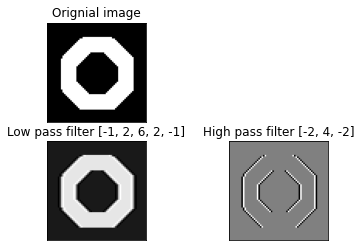

In [ ]:
#-------------------------------
# 1.1 FILTRERING IN ONE DIRECTION
#-------------------------------
print("")
img_comp_lowpassfilter = convOneDirection (img, [-1, 2, 6, 2, -1]) 
img_comp_highpassfilter = convOneDirection (img, [-2, 4, -2]) 
plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([]), plt.title('Orignial image')
plt.subplot(2,2,3),plt.imshow(img_comp_lowpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([]), plt.title('Low pass filter [-1, 2, 6, 2, -1]')
plt.subplot(2,2,4),plt.imshow(img_comp_highpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([]), plt.title('High pass filter [-2, 4, -2]')
plt.show()

For filtering in the other direction, instead of having another function (or add a parameter to this function), we will use a trick: mirror the matrix on its diagonal. If you mirror the matrix, do a convolution on x axis and mirror the matrix again, you have performed a convolution in the y axis direction. The mirror function is given below and is named mirrorMatrix. Read and understand its code. You can also run it on an image (not a symetrical image if you want to see something). Note that this function take a little bit of time processing to do so ; in real life, we won't do so ;).

In [ ]:
# 1.3 Mirror the matrix
def mirrorMatrix(img):
    img_miror = np.zeros((len(img[0]), len(img)))
    for i in range (0, len(img[0])):
        for j in range(0, len(img)):
            img_miror[i][j] = img[j][i]
    return img_miror

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.2. Downsample in one direction</span>

The second tool for DWT is downsampling by 2. 

Downsampling will start form the first pixel after a low pass filter, and from the second pixel after a high pass filter. The generic function takes the information of the first pixel to start with (either 0 or 1).

Fill in the code:

In [ ]:
 # Downsampling in one direction
def downsamplOneDirection(img,firstPoint): 
    img_downsampl = np.zeros((len(img), len(img[0])//2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])//2):
            img_downsampl[i][j] = img[i][2*j+firstPoint]
    return img_downsampl

<details>
  <summary> Hint 1 </summary>
  <pre>
Here again, draw on a paper the image with its size and index, so that you won't get lost with the index.
  </pre>
</details>
<details>
  <summary> Hint 2 </summary>
  <pre>
Iterate on (i,j) pixels of the target image. 
For i, take all the lines of the original image. 
For j, take one row out of 2. 
Don't forget to start at the firstPoint (0 or 1), mentionned as a parameter of the function.
  </pre>
</details>
<details>
  <summary> Hint 3 </summary>
  <pre>
Go to Hint 1.
  </pre>
</details>

<details>
  <summary> One solution </summary>
  <pre>
<code> # Downsampling in one direction
def downsamplOneDirection(img,firstPoint): 
    img_downsampl = np.zeros((len(img), len(img[0])//2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])//2):
            img_downsampl[i][j] = img[i][2*j+firstPoint]
    return img_downsampl
    </code></pre>
</details>

[Go to one solution](#solution_1_2)

<a name="back_1_2"></a>
Test it with the Le Gall kernel wavelet to get this result:

![downsampling.png](https://drive.google.com/uc?id=1e5Dz29wA9ZEHp3IMtQOiMYL8D3GZWFrS
)


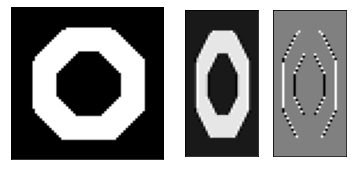

In [ ]:
#-------------------------------
# 1.2 DOWNSAMPLE IN ONE DIRECTION
#-------------------------------
print("")
img_comp_lowpassfilter = convOneDirection (img, [-1, 2, 6, 2, -1]) 
img_comp_highpassfilter = convOneDirection (img, [-2, 4, -2]) 
img_comp_lowpassfilter = downsamplOneDirection (img_comp_lowpassfilter, 0) 
img_comp_highpassfilter = downsamplOneDirection (img_comp_highpassfilter, 1) 
plt.subplot(1,2,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(img_comp_lowpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(img_comp_highpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

For downsampling in the other direction, we will use the same trick as for convolution: mirror the matrix. The same mirror function named mirrorMatrix can be used.

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.3. Decomposition</span>

The whole decomposition is made of convolutions and downsampling on both axis. Refer to the picture with the whole pipeline at the beginning of the section and complete the whole decomposition.


Image with max amplitude : 255
Starting decomposition...
Decommposition finished
Max amplitude of integer images are : 255 2295.0 1020.0 19380.0 10200.0 10200.0 12240.0
The images are 32 pixels wide and 32 pixels high.


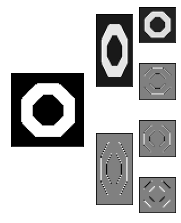

In [ ]:
#-------------------------------
# DECOMPOSITION
#-------------------------------
# Decomposition
print("")
print("Image with max amplitude : " + str(np.max(img)))
print("Starting decomposition...")
coefMult = 8 # to keep integer for computation
kernelL = [-1, 2, 6, 2, -1] # coefMult*[-1, 2, 6, 2, -1]/8
kernelH = [-4, 8, -4] # coefMult*[-1, 2, -1]/2
firstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgL = downsamplOneDirection(convOneDirection(img, kernelL), firstPointL) # LossPass Filter on width + downsample by 2
imgLcopy = mirrorMatrix(deepcopy(imgL))
imgLL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgLH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2
imgH = downsamplOneDirection(convOneDirection(img, kernelH), firstPointH) # LossPass Filter on width + downsample by 2
imgHcopy = mirrorMatrix(deepcopy(imgH))
imgHL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgHH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2

print("Decommposition finished")
print("Max amplitude of integer images are : " + str(np.max(img)) + " " + str(np.max(imgL))+ " " + str(np.max(imgH))+ " " + str(np.max(imgLL))+ " " + str(np.max(imgLH))+ " " + str(np.max(imgHL))+ " " + str(np.max(imgHH)))
print("The images are " + str(len(imgLL[0])) + " pixels wide and " + str(len(imgLL)) + " pixels high.")

# Verify by plotting the different images:
plt.subplot(1,4,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,3),plt.imshow(imgL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,11),plt.imshow(imgH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,4),plt.imshow(imgLL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,12),plt.imshow(imgLH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,20),plt.imshow(imgHL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,28),plt.imshow(imgHH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

[Go to one solution](#solution_1_3)

<a name="back_1_3"></a>
# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2. Reconstruction & Verification</span>

Reconstruction is the opposite process:
   ![decomposition.png](https://drive.google.com/uc?id=1bAwm_IzW-Jq4nmYKKnU_OQRZT9c2c2Hv
)

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.1. Reconstruction</span>

The function for upsampling is the following one:

In [ ]:
# 2.1 Upsampling in one direction
def upsamplOneDirection(img,firstPoint): 
    img_upsubsampl = np.zeros((len(img), len(img[0])*2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])):
            img_upsubsampl[i][j*2+firstPoint] = img[i][j]
    return img_upsubsampl

Complete the code of reconstruction if you have time (and if you want) or directely [go to one solution](#solution_2_1)


Starting recontruction...
Reconstruction finished
Max amplitude of integer images are : 155040.0 61200.0 81600.0 73440.0 146880.0 65280.0 1175040.0 391680.0 1044480.0
The image is 64 pixels wide and 64 pixels high.


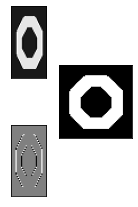

In [ ]:
#-------------------------------
# RECONSTRUCTION
#-------------------------------
# Reconstruction
print("")
print("Starting recontruction...")
kernelH = [-1, -2, 6, -2, -1] # coefMult*[-1, -2, 6, -2, -1]/8
kernelL = [4, 8, 4] # coefMult*[1, 2, 1]/2
irstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgRL1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLL),firstPointL), kernelL)
imgRL2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLH),firstPointH), kernelH)
imgRL = mirrorMatrix(imgRL1+imgRL2)
imgRH1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHL),firstPointL), kernelL) 
imgRH2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHH),firstPointH), kernelH) 
imgRH = mirrorMatrix(imgRH1+imgRH2)
imgR1 = convOneDirection(upsamplOneDirection(imgRL,firstPointL), kernelL)
imgR2 = convOneDirection(upsamplOneDirection(imgRH,firstPointH), kernelH)
imgR = imgR1 + imgR2
plt.subplot(2, 8, 6),plt.imshow(imgRL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 8, 14),plt.imshow(imgRH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4),plt.imshow(imgR, cmap = 'gray'), plt.xticks([]), plt.yticks([])
print("Reconstruction finished")
print("Max amplitude of integer images are : " + str(np.max(imgRL1)) + " " + str(np.max(imgRL2))+ " " + str(np.max(imgRH1))+ " " + str(np.max(imgRH2))+ " " + str(np.max(imgRL))+ " " + str(np.max(imgRH))+ " " + str(np.max(imgR1))+ " " + str(np.max(imgR2))+ " " + str(np.max(imgR)))
print("The image is " + str(len(imgR[0])) + " pixels wide and " + str(len(imgR)) + " pixels high.")
plt.show()

<a name="back_2_1"></a>
## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.2. Verification</span>

If we apply decomposition / reconstruction, we should get the orginal image. Let's verify !

Read and understand the following code. 


  <pre>
<code>#-------------------------------
# VERIFICATION
#-------------------------------
imgRCoef = imgR//coefMult**4 # coefMult**4 is due to the fact that we keep integers before - see kernel values
print("")
print("Starting verification...")
edge = 3
maskVerif = np.abs((img-imgRCoef)[edge:len(img)-edge, edge:len(img[0])-edge]) # difference between the 2 images, without the edges 
print("Mask delta value : " + str(np.max(maskVerif)) )
maskVerif[0][0] = 0; maskVerif[0][1] = 255 # to avoid min-max equalization from matplotlib :)
plt.imshow(maskVerif, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()</code>
    </pre>



Before running this code, answer the following questionnaire.

<b>By applying the DTW on imsynth.bmp, the mask delta value should be:</b>

<div>
  <input type="checkbox">
  <label>0</label>
</div>

<div>
  <input type="checkbox">
  <label>Above 0</label>
</div>

<div>
  <input type="checkbox">
  <label>Below 0</label>
</div>

<details>
  <summary> Answer </summary>
The mask delta value should be <b>0</b> ! And you should have a black image (expect the 2nd pixel because... matplotlib... you know the story). We do not loose information via this process.
</details>

<b>If we apply DTW on Lena.bmp, when we compare the reconctructed image to the original image :</b>

<div>
  <input type="checkbox">
  <label>We have the exact same image.</label>
</div>

<div>
  <input type="checkbox">
  <label>The reconstructued image is bit different from the original image, but, as human being, we can't really see the difference.</label>
</div>

<details>
  <summary> Answer </summary>
The image reconstructed is <b>the same</b> as the original image, except on the edges of the image (because we did not perform the convolution on those parts).
</details>


Starting verification...
Mask delta value : 0.0


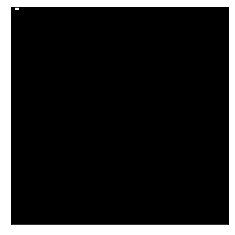

In [ ]:
#-------------------------------
# VERIFICATION
#-------------------------------
imgRCoef = imgR//coefMult**4 # coefMult**4 is due to the fact that we keep integers before - see kernel values
print("")
print("Starting verification...")
edge = 3
maskVerif = np.abs((img-imgRCoef)[edge:len(img)-edge, edge:len(img[0])-edge]) # difference between the 2 images, without the edges 
print("Mask delta value : " + str(np.max(maskVerif)) )
maskVerif[0][0] = 0; maskVerif[0][1] = 255 # to avoid min-max equalization from matplotlib :)
plt.imshow(maskVerif, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

<a name="back_2_2"></a>
The mask delta value should be 0 ! And you should have a black image (expect the 2nd pixel because... matplotlib... you know the story).

On several images (imsynth.bmp, Lena.bmp, ...), verify that the image reconstructed is the same as the original image. Do not take into account the edges of the image (because we did not perform the convolution on those parts).


# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  Solutions </span>

<div id="sol_1"/>


<a name="solution_1_1"></a>
## 1.1 Convolution in one direction

In [ ]:
# Convolution in one direction
def convOneDirection (img, kernel) :
    h = len(kernel)//2
    img_conv = np.zeros(img.shape)
    for i in range (0, len(img)):
        for j in range(h, len(img[0])-h):
            sum=0
            for m in range(len(kernel)):
                sum=sum+kernel[m]*img[i][j-h+m]
            img_conv[i][j] = sum
    return img_conv

[Back.](#back_1_1)


<div id="sol_2"/>

<a name="solution_1_2"></a>
## 1.2 Downsampling in one direction

In [ ]:
# Downsampling in one direction
def downsamplOneDirection(img,firstPoint): 
    img_downsampl = np.zeros((len(img), len(img[0])//2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])//2):
            img_downsampl[i][j] = img[i][2*j+firstPoint]
    return img_downsampl

[Back.](#back_1_2)

<div id="sol_3"/>

<a name="solution_1_3"></a>
## 1.3 Decomposition


Image with max amplitude : 255
Starting decomposition...
Decommposition finished
Max amplitude of integer images are : 255 2295.0 1020.0 19380.0 10200.0 10200.0 12240.0
The images are 32 pixels wide and 32 pixels high.


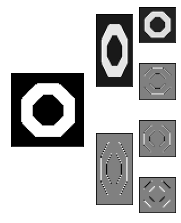

In [ ]:
#-------------------------------
# DECOMPOSITION
#-------------------------------
# Decomposition
print("")
print("Image with max amplitude : " + str(np.max(img)))
print("Starting decomposition...")
coefMult = 8 # to keep integer for computation
kernelL = [-1, 2, 6, 2, -1] # coefMult*[-1, 2, 6, 2, -1]/8
kernelH = [-4, 8, -4] # coefMult*[-1, 2, -1]/2
firstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgL = downsamplOneDirection(convOneDirection(img, kernelL), firstPointL) # LossPass Filter on width + downsample by 2
imgLcopy = mirrorMatrix(deepcopy(imgL))
imgLL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgLH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2
imgH = downsamplOneDirection(convOneDirection(img, kernelH), firstPointH) # LossPass Filter on width + downsample by 2
imgHcopy = mirrorMatrix(deepcopy(imgH))
imgHL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgHH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2

print("Decommposition finished")
print("Max amplitude of integer images are : " + str(np.max(img)) + " " + str(np.max(imgL))+ " " + str(np.max(imgH))+ " " + str(np.max(imgLL))+ " " + str(np.max(imgLH))+ " " + str(np.max(imgHL))+ " " + str(np.max(imgHH)))
print("The images are " + str(len(imgLL[0])) + " pixels wide and " + str(len(imgLL)) + " pixels high.")

# Verify by plotting the different images:
plt.subplot(1,4,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,3),plt.imshow(imgL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,11),plt.imshow(imgH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,4),plt.imshow(imgLL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,12),plt.imshow(imgLH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,20),plt.imshow(imgHL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,28),plt.imshow(imgHH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

[Back.](#back_1_3)

<div id="sol_4"/>

<a name="solution_2_1"></a>
## 2.1 Reconstruction


Starting recontruction...
Reconstruction finished
Max amplitude of integer images are : 155040.0 61200.0 81600.0 73440.0 146880.0 65280.0 1175040.0 391680.0 1044480.0
The image is 64 pixels wide and 64 pixels high.


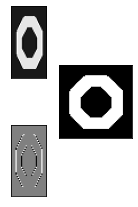

In [ ]:
#-------------------------------
# RECONSTRUCTION
#-------------------------------
# Reconstruction
print("")
print("Starting recontruction...")
kernelH = [-1, -2, 6, -2, -1] # coefMult*[-1, -2, 6, -2, -1]/8
kernelL = [4, 8, 4] # coefMult*[1, 2, 1]/2
irstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgRL1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLL),firstPointL), kernelL)
imgRL2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLH),firstPointH), kernelH)
imgRL = mirrorMatrix(imgRL1+imgRL2)
imgRH1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHL),firstPointL), kernelL) 
imgRH2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHH),firstPointH), kernelH) 
imgRH = mirrorMatrix(imgRH1+imgRH2)
imgR1 = convOneDirection(upsamplOneDirection(imgRL,firstPointL), kernelL)
imgR2 = convOneDirection(upsamplOneDirection(imgRH,firstPointH), kernelH)
imgR = imgR1 + imgR2
plt.subplot(2, 8, 6),plt.imshow(imgRL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 8, 14),plt.imshow(imgRH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4),plt.imshow(imgR, cmap = 'gray'), plt.xticks([]), plt.yticks([])
print("Reconstruction finished")
print("Max amplitude of integer images are : " + str(np.max(imgRL1)) + " " + str(np.max(imgRL2))+ " " + str(np.max(imgRH1))+ " " + str(np.max(imgRH2))+ " " + str(np.max(imgRL))+ " " + str(np.max(imgRH))+ " " + str(np.max(imgR1))+ " " + str(np.max(imgR2))+ " " + str(np.max(imgR)))
print("The image is " + str(len(imgR[0])) + " pixels wide and " + str(len(imgR)) + " pixels high.")
plt.show()

[Back.](#back_2_1)

<div id="sol_5"/>

<a name="solution_2_2"></a>
## 2.2 Verification


Starting verification...
Mask delta value : 0.0


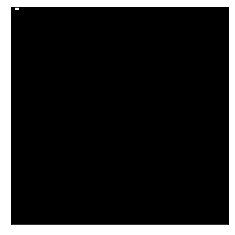

In [ ]:
#-------------------------------
# VERIFICATION
#-------------------------------
imgRCoef = imgR//coefMult**4 # coefMult**4 is due to the fact that we keep integers before - see kernel values
print("")
print("Starting verification...")
edge = 3
maskVerif = np.abs((img-imgRCoef)[edge:len(img)-edge, edge:len(img[0])-edge]) # difference between the 2 images, without the edges 
print("Mask delta value : " + str(np.max(maskVerif)) )
maskVerif[0][0] = 0; maskVerif[0][1] = 255 # to avoid min-max equalization from matplotlib :)
plt.imshow(maskVerif, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

[Back.](#back_2_2)